# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rafi Prathama Nugraha
- **Email:** m312b4ky3585@bangkit.academy
- **ID Dicoding:** rafi_prathama

## Menentukan Pertanyaan Bisnis

- Apakah terdapat perbedaan jumlah rata-rata pengunjung pada holiday dan weekday?
- Bagaimana pengaruh kelembapan terhadap total jumlah peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


## Data Wrangling

### Gathering Data

In [4]:
df1 = pd.read_csv('day.csv')
df2 = pd.read_csv('hour.csv')

df = pd.concat([df1, df2], ignore_index=True)

**Insight:**
- Penggabungan 2 data menjadi satu DataFrame untuk memudahkan analisis.
- Setelah penggabungan, DataFrame siap digunakan untuk analisis data.

### Assessing Data

In [5]:
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  hr  
0   985 NaN  
1   801 NaN  
2  1349 NaN  
3  1562 NaN  
4  1600 NaN  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
 16  hr          17379 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB
None


In [7]:
print(df.describe())

            instant        season            yr          mnth       holiday  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean    8354.006405      2.501436      0.502485      6.537051      0.028769   
std     5180.771860      1.107045      0.500008      3.439213      0.167160   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3797.250000      2.000000      0.000000      4.000000      0.000000   
50%     8324.500000      3.000000      1.000000      7.000000      0.000000   
75%    12851.750000      3.000000      1.000000     10.000000      0.000000   
max    17379.000000      4.000000      1.000000     12.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  18110.000000  18110.000000  18110.000000  18110.000000  18110.000000   
mean       3.003424      0.682772      1.424075      0.496922      0.475718   
std        2.005677      0.465410      0.635830    

**Insight:**
- Pada analisis statistik, ditemukan kolom yang tidak normal, missing value, dan tipe data.
- Memastikan tipe data yang sudah sesuai penting, karena dapat menyebabkan kesalahan saat analisis.

### Cleaning Data

In [10]:
print(df.isnull().sum())

df.dropna(inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64


In [9]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

0


**Insight:**
- Missing value dan duplikat pada baris dapat menggangu analisis, karena dapat menyebabkan bias dan hasil analisis menjadi tidak akurat.
- Membersihkan baris duplikat dan missing value dengan imputasi dapat membantu memastikan hasil analisis yang lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
df['is_holiday'] = np.where(df['holiday'] == 1, 'Holiday', 'Weekday')
avg_visitors_holiday = df.groupby('is_holiday')['cnt'].mean(). reset_index()
avg_visitors_hum = df.groupby('hum')['cnt'].mean().reset_index()

**Insight:**
- DataFrame diatas memberikan penjelasan tentang banyaknya pengunjung yang datang di waktu weekday maupun holiday. Sehingga dapat digunakan untuk pengambilan keputusan.
- Penjelasan mengenai pengaruh kelembaban juga di jelaskan pada jumlah pengunjung di tingkat tertentu lebih banyak daripada tingkat yang lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

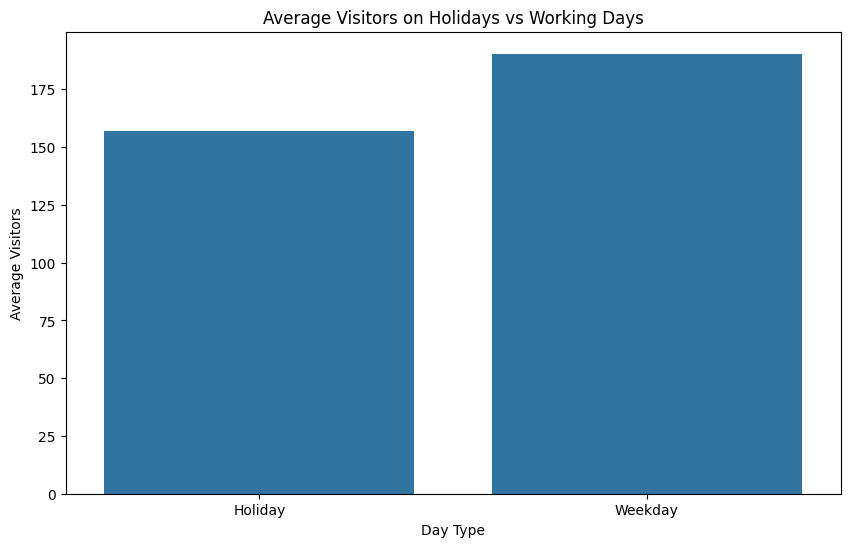

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_visitors_holiday, x='is_holiday', y='cnt')
plt.title('Average Visitors on Holidays vs Weekday Days')
plt.ylabel('Average Visitors')
plt.xlabel('Day Type')
plt.show()


### Pertanyaan 2:

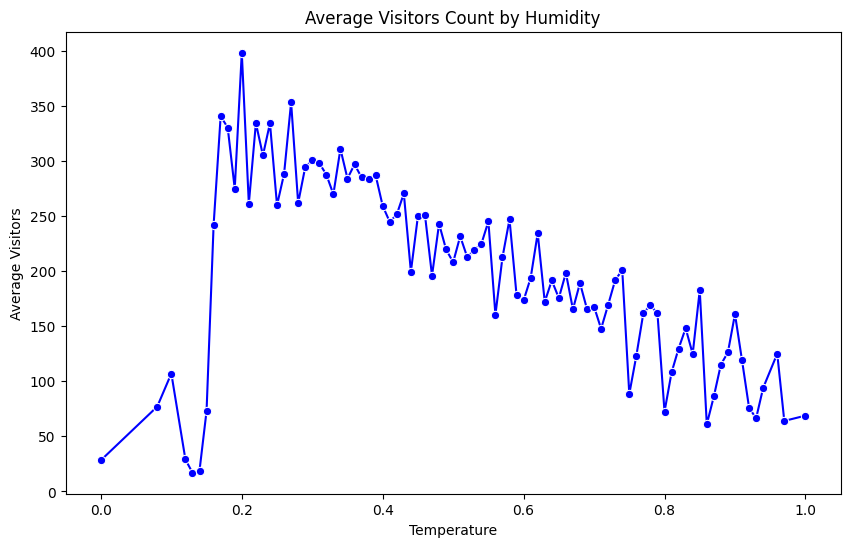

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_visitors_hum, x='hum', y='cnt', marker='o', color='blue')
plt.title('Average Visitors Count by Humidity')
plt.ylabel('Average Visitors')
plt.xlabel('Temperature')
plt.show()

**Insight:**
- Diagram Batang memberikan gambaran tentang perbedaan jumlah pengunjung antara waktu holiday dan weekday. Memberikan informasi bahwa pengunjung waktu holiday lebih banyak di banding weekday.
- Diagram garis menunjukkan pola tertentu antara kelembaban dan jumlah pengunjung.

## Analisis Lanjutan (Opsional)

## Conclusion

In [26]:
df.to_csv("all_data.csv", index=False)

- Analisis menunjukkan bahwa jumlah rata-rata pengunjung di waktu holiday lebih banyak di bandingkan waktu weekday.
- Analisis menunjukkan adanya pola tertentu dalam jumlah pengunjung. Pada titik 0.2 menunjukkan jumlah pengunjung paling banyak, pada rentang kelembaban 0.2 hingga 1.0 menunjukkan pola penurunan pengunjung.